In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words

In [23]:
df = pd.read_excel('Data All.xlsx',header=0,encoding = 'unicode_escape', index_col=0)
df = df.drop_duplicates(['tweet_bersih'])
df.head

<bound method NDFrame.head of                                                        tweets  \
Unnamed: 0                                                      
0           $BAND volume boost!\n10 times the average volu...   
1           RT @TheMoonCarl: WTF?? YouTube deleted my late...   
2           LAST TRADE: BUY 0.12431885BTC@6945.1EUR\nSELL ...   
3           RT @TokensNet: Buying cryptocurrency with fiat...   
5           RT @blockchainchick: Stocks are in a world of ...   
...                                                       ...   
94          @BrendanEich @dpinsen @Schuldensuehner It seem...   
95          RT @FidesExchange: Trade HyperStake (HYP) with...   
96          The MOVIECASH coin from the CINEMADROM! https:...   
98          Wuxian Ico Review : A Hybrid Cryptocurrency Ga...   
99          How to clean the dust in your Coinbase Pro and...   

                             id                date              source lang  \
Unnamed: 0                                  

In [24]:
df_positif = df[df['sentiment'] == 'Positif']
df_negatif = df[df['sentiment'] == 'Negatif']
df_netral = df[df['sentiment'] == 'Netral']
sentimen_count = df['sentiment'].value_counts()
sentimen_count

Netral     1543
Positif    1418
Negatif     472
Name: sentiment, dtype: int64

In [25]:
stopwords = get_stop_words('english')
stopwords_add = list()
stopwords_add = ['crypto', 'btc', 'get', 'new', 'will']
stopwords += stopwords_add

In [26]:
words_positif = ' '.join(df_positif['tweet_bersih'])
words_negatif = ' '.join(df_negatif['tweet_bersih'])
words_netral = ' '.join(df_netral['tweet_bersih'])

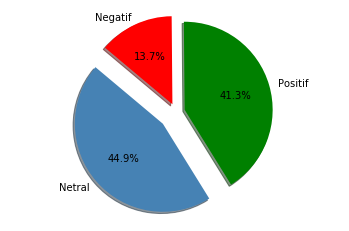

In [52]:
labels = sentimen_count.index
sizes = sentimen_count
colors = ['steelblue', 'green', 'red']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.savefig('sentiments.png', bbox_inches='tight', dpi=250)
plt.show()

## Word Cloud Positif

In [39]:
mask = np.array(Image.open("shape.png"))
wordcloud = WordCloud(stopwords = stopwords, background_color='white', height = 2000, width = 2000, max_words = 50, font_path='lucidasansdemibold.ttf', prefer_horizontal=0.70, colormap='copper', mask=mask).generate(words_positif)

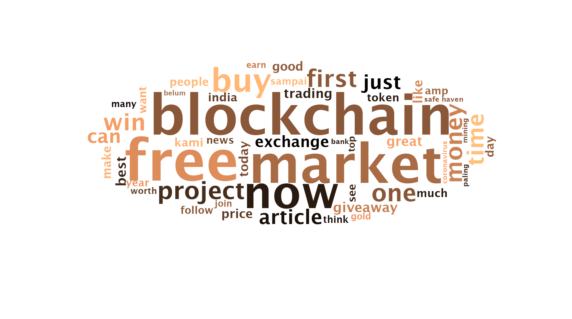

In [40]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.ion()
plt.show()

In [41]:
# Save WC Positif
wordcloud.to_file("wordcloud_positif.png")

## Word Cloud Negatif

In [42]:
mask = np.array(Image.open("shape.png"))
wordcloud = WordCloud(stopwords = stopwords, background_color='white', height = 2000, width = 2000, max_words = 50, font_path='lucidasansdemibold.ttf', prefer_horizontal=0.70, colormap='copper', mask=mask).generate(words_negatif)

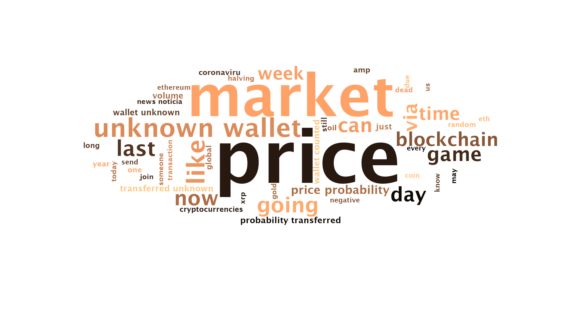

In [43]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.ion()
plt.show()

In [44]:
# Save WC Negatif
wordcloud.to_file("wordcloud_negatif.png")

## Word Cloud Netral

In [45]:
mask = np.array(Image.open("shape.png"))
wordcloud = WordCloud(stopwords = stopwords, background_color='white', height = 2000, width = 2000, max_words = 50, font_path='lucidasansdemibold.ttf', prefer_horizontal=0.70, colormap='copper', mask=mask).generate(words_netral)

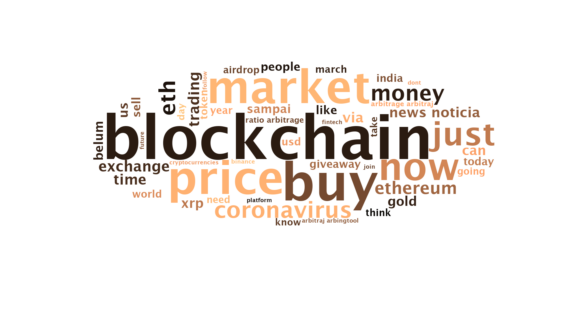

In [46]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.ion()
plt.show()

In [47]:
# Save WC Netral
wordcloud.to_file("wordcloud_netral.png")